# Le problème du sac à dos

## approches d'un problème NP-complet

Le [problème du sac à dos](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_sac_%C3%A0_dos) est un problème classique d'algorithmique ; il appartient à la classe des [problèmes NP-complets](https://fr.wikipedia.org/wiki/Probl%C3%A8me_NP-complet) (une classe importante de problèmes difficiles que l'on résout dans la pratique en privilégiant des solutions approchées).

## Énoncé du problème

On cherche à remplir un sac à dos d'objets variés, chacun étant caractérisé par une valeur (prix, utilité, etc.) sans dépasser un certain encombrement maximal (poids, volume, etc.).

![Problème du sac à dos](https://upload.wikimedia.org/wikipedia/commons/f/fd/Knapsack.svg)

## Création du sac à dos
Chaque objet sera représenté par un tuples d'entiers ou de flottants. Ces objets seront créés de façon aléatoire. Le tuple contiendra, dans l'ordre, la valeur et l'encombrement de l'objet.

On utilisera le module `random` pour créer le sac ; un protocole identique sera utilisé par tous les élèves (afin de disposer exactement du même ensemble d'objets ce qui permettra par la suite de comparer les résultats). Il est possible d'ajuster le générateur de nombre aléatoires de telle sorte que chaque élève tire les mêmes nombres d'un ordinateur à l'autre.

In [28]:
from random import randrange, shuffle, seed

seed(42) # utilisation d'une graine garantissant un tirage identique pour tous les élèves

items = [ (randrange(1, 21), randrange(1, 21)) for _ in range(96) ]

In [4]:
# Quelques statistiques sommaires
# ===============================

print("Valeur totale des objets disponibles :     ", sum(x[0] for x in items))
print("Encombrement total des objets disponibles :", sum(x[1] for x in items))

Valeur totale des objets disponibles :      973
Encombrement total des objets disponibles : 990


## Résolution du problème
De nombreuses idées peuvent être envisagées  ; on laisse les élèves réfléchir à la question. Plusieurs algorithmes seront étudiés en cours.

> **L'encombrement maximal autorisé est : 125**

In [23]:
# variable globale donnant l'encombrement maximal autorisé
# IMPORTANT : penser à exécuter cette cellule sinon des erreurs surviendront

maxWeight = 125

### Recours à un algorithme glouton

La famille des [algorithmes gloutons](https://fr.wikipedia.org/wiki/Algorithme_glouton) se présente rapidement à l'esprit : on se contente naïvement de piocher l'objet le plus intéressant (par sa valeur élevée ou encore par son faible encombrement) encore disponible jusqu'à ce que le sac à dos soit rempli ; si un objet est trop encombrant on le passe car on en trouvera peut-être ensuite un autre (moins intéressant mais permettant quand même de compléter le sac à dos).

#### Utilisation des clefs de tri

L'algorithme glouton suppose que l'on dispose d'une version préalablement triée des objets ; il existe en Python une méthode `sort` associée aux listes dont le comportement peut être affiné grâce à l'usage d'une clef de tri. La clef de tri est en Python une fonction qui associe à chaque objet (de nature quelconque) trié une valeur (généralement numérique) qui sera utilisée lors du tri. À titre d'exemple, une liste de nombres complexes ne peut être nativement triée, mais on peut imposer un tri selon le module des nombres avec `L.sort(key=abs)`.

Si l'on souhaite trier les objets du sac à dos selon la valeur (décroissante) des objets, la clef suivante pourra être utilisée :

    mykey = lambda x: -x[0]

afin d'associer un nombre (négatif) faible aux objets précieux et un nombre (négatif) plus élevé pour les objets dénués d evaleur.

On peut encore perfectionner cette clef en utilisant :

    lambda x: (-x[0], x[1])

qui permettra un tri selon la valeur (décroissante) et, en cas d'égalité, selon l'encombrement (croissant).

In [29]:
items2 = list(items)
items2.sort(key = lambda x: (-x[0], x[1]))

print(items2)

[(20, 6), (20, 7), (20, 11), (19, 3), (19, 13), (19, 14), (18, 7), (18, 8), (18, 8), (18, 9), (18, 9), (17, 1), (17, 4), (17, 6), (17, 15), (17, 20), (17, 20), (16, 1), (16, 3), (16, 13), (16, 18), (15, 5), (15, 12), (15, 17), (15, 18), (15, 19), (14, 2), (14, 7), (14, 8), (14, 20), (13, 9), (13, 9), (13, 20), (12, 7), (12, 8), (12, 15), (12, 19), (12, 20), (11, 2), (11, 4), (11, 4), (11, 7), (11, 9), (11, 13), (10, 3), (10, 8), (10, 13), (10, 14), (10, 17), (10, 20), (9, 1), (9, 2), (9, 3), (9, 3), (9, 5), (9, 8), (9, 18), (8, 2), (8, 3), (8, 4), (8, 5), (8, 18), (7, 3), (7, 8), (7, 18), (7, 19), (6, 9), (6, 12), (6, 14), (6, 15), (6, 15), (6, 18), (5, 5), (5, 6), (5, 7), (5, 12), (5, 17), (4, 1), (4, 8), (4, 12), (4, 12), (4, 13), (4, 18), (3, 13), (3, 13), (3, 16), (3, 18), (3, 18), (3, 19), (2, 4), (2, 8), (2, 8), (1, 3), (1, 4), (1, 9), (1, 18)]


Imaginer diverses clefs de tri (selon la valeur décroissante, l'encombrement croissant, etc.) et les appeler `key1`, '`key2`, `key3`, etc.

In [8]:
key1 = lambda x: (-x[0], x[1])  # clef pour trier selon la valeur décroissante des objets
# key2 = ...
# key3 = ...

#### Mise en œuvre de l'algorithme

Écrire une fonction `greedy` prenant en arguments une liste d'objets et une clef de tri, et effectuant les opérations suivantes :

  * tri d'une **copie** de la liste (afin de ne pas modifier la liste de départ) ;
  * création d'un sac à dos ne dépassant pas l'encombrement `maxWeight` (variable globale définie plus haut) par parcours de la liste triée.

La fonction retournera une liste d'objets dont l'encombrement total ne dépassera pas la valeur spécifiée.

In [20]:
def greedy(it, key):
    pass

#### Comparaison des clefs de tri

Quelle clef donne le meilleur résultat ? Ce résultat est-il optimal ?

In [ ]:
# Test de la fonction

value, weight, knapsack = greedy(items, key1)
print("Valeur du sac à dos :      ", value)
print("Encombrement du sac à dos :", weight)

La liste définie ci-dessus (à partir de la graine 42) peut donner lieu à un sac à dos de valeur au moins égale à 395 ; cette valeur est-elle atteinte par une des clefs imaginées plus haut ?

In [56]:
# Exemple d'un sac à dos de valeur 392
test = [(8, 2), (8, 3), (8, 4), (9, 1), (9, 2), (9, 3), (9, 3), (10, 3), (11, 2), (11, 4), (11, 4),
        (14, 2), (14, 7), (14, 8), (15, 5), (16, 1), (16, 3), (17, 1), (17, 4), (17, 6), (18, 7),
        (18, 8), (18, 8), (18, 9), (18, 9), (19, 3), (20, 6), (20, 7)]

print("Valeur totale du sac à dos  :    ", sum(x[0] for x in test))
print("Encombrement total du sac à dos :", sum(x[1] for x in test))

Valeur totale du sac à dos  :     392
Encombrement total du sac à dos : 125


In [57]:
test = [(20, 6), (20, 7), (19, 3), (18, 7), (18, 8), (18, 8), (18, 9), (18, 9), (17, 1), (17, 4),
        (17, 6), (16, 1), (16, 3), (15, 5), (14, 2), (14, 7), (11, 2), (11, 4), (11, 4), (11, 7),
        (10, 3), (9, 1), (9, 2), (9, 3), (9, 3), (8, 2), (8, 3), (8, 4), (4, 1)]

print("Valeur totale du sac à dos  :    ", sum(x[0] for x in test))
print("Encombrement total du sac à dos :", sum(x[1] for x in test))

Valeur totale du sac à dos  :     393
Encombrement total du sac à dos : 125


In [58]:
test = [(20, 7), (11, 4), (19, 3), (4, 1), (9, 2), (9, 1), (11, 2), (8, 3), (18, 8), (14, 2),
        (17, 6), (20, 11), (9, 3), (18, 7), (17, 1), (9, 3), (16, 3), (11, 4), (16, 1),
        (18, 9), (10, 3), (20, 6), (14, 7), (8, 2), (17, 4), (18, 9), (15, 5), (18, 8)]

print("Valeur totale du sac à dos  :    ", sum(x[0] for x in test))
print("Encombrement total du sac à dos :", sum(x[1] for x in test))

print(list(sorted([ items.index(x) for x in test ])))

Valeur totale du sac à dos  :     394
Encombrement total du sac à dos : 125
[0, 5, 13, 17, 17, 21, 29, 35, 35, 36, 37, 37, 41, 42, 48, 51, 51, 56, 70, 71, 73, 76, 77, 78, 82, 89, 90, 95]


In [8]:
test = [(4, 1), (14, 2), (9, 1), (11, 4), (9, 2), (7, 3), (10, 3), (8, 4), (9, 3), (20, 6),
        (18, 8), (18, 8), (11, 2), (8, 2), (9, 3), (15, 5), (18, 9), (16, 3), (18, 9), (11, 4),
        (17, 6), (17, 4), (20, 7), (17, 1), (20, 11), (16, 1), (19, 3), (18, 7), (8, 3)]

print("Valeur totale du sac à dos  :    ", sum(x[0] for x in test))
print("Encombrement total du sac à dos :", sum(x[1] for x in test))

Valeur totale du sac à dos  :     395
Encombrement total du sac à dos : 125


#### Modification des fonctions pour travailler sur des indices

La fonction `greedy` retourne actuellement une liste de couples ; or certains objets disponibles sont en double, ce qui risque d'engendrer des confusions si l'on en vient à se demander quel objet a été pris ou non.

Modifier la fonction `greedy` ; afin de travailler désormais sur des indices (se référant aux objets de la liste `items` initiale). La fonction retourne désormais une liste d'indices. **Il faudra sans doute modifier les clefs de tri pour les rendre compatibles avec un travail sur les indices à moins de programmer la nouvelle fonction de façon assez élaborée.**

In [21]:
def greedy_indices(it, key):
    pass

In [12]:
# Test
# ====

# ATTENTION : ce test utilise l'ancienne clef en supposant que la nouvelle fonction
# garantit la compatibilité avec la version précédente ; si ce n'est pas le cas, il
# faut impérativement redéfinir la clef afin de travailler sur les indices de la
# liste 'items' (variable globale)

greedy_indices(items, key1) # tri selon la valeur décroissante

(307, 125, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18])

### Recours à une méthode de Monte-Carlo

On appelle [méthode de Monte-Carlo](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo) une méthode recourant à des tirages aléatoires ; fréquemment ce genre de méthode procède par améliorations successives d'une solution initiale.

Diverses stratégies peuvent être imaginées ici ; on se contentera d'une approche assez simple : on itère un certains nombre de fois en supprimant du sac à dos `k` objets (choisis aléatoirement) que l'on remplace ensuite par d'autres objets (eux-mêmes choisis aléatoirement).

Il est préférable de travailler sur des indices (sans cela des problèmes risquent très certainement de survenir du fait des doublons dans la liste d'objets disponibles).

Écrire une fonction `montecarlo` prenant en arguments :

  * une liste des objets disponibles ;
  * le sac à dos de départ (donc une liste d'indices se référant à l'argument précédent) ;
  * le nombre d'itérations souhaitées ;
  * le nombre d'objets à écarter lors de chaque itération.

À chaque étape, une variante aléatoire du sac à dos est donc construite ; sa valeur est estimée, et si elle est meilleure que la valeur du sac à dos précédent, on conserve cette variante (sinon on revient à la version précédente).

_Cette partie peut donner lieu à une programmation particulièrement soigneuse ; on peut notamment éviter de multiplier les copies de listes en tenant un décompte précis des objets écartés, remplacés, etc._

In [18]:
from random import shuffle

def montecarlo(items, knapsack, nbr, k):
    pass

In [40]:
# choix d'un sac à dos de départ

_, _, test = greedy_indices(items, key1)

print( montecarlo(items, test, 5000, 2) )

(394, 125, [17, 59, 52, 9, 3, 7, 57, 44, 53, 11, 33, 40, 39, 51, 6, 1, 77, 0, 12, 50, 10, 13, 58, 8, 18, 26, 38, 27, 21])


## Tracé des solutions

On représente ici les objets disponibles à l'aide d'un nuage de points verts (la valeur en abscisse et l'encombrement en ordonnée). S'il reste au moins un objet disponible identique à un objet sélectionné, cela se remarquera grâce à la taille des points.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def myplot(knapsack):
    # liste des objets non utilisés
    unused = list(set(range(len(items)))-set(knapsack))

    plt.plot(*zip(*[items[x] for x in unused]), "og", markersize=9)
    plt.plot(*zip(*[items[x] for x in knapsack]), "om", markersize=7)

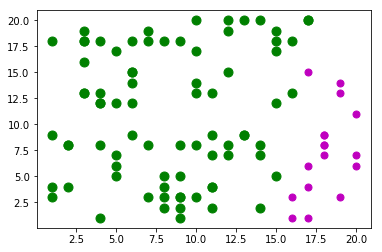

In [24]:
# sac à dos que l'on souhaite représenter (glouton selon la valeur)
# ATTENTION à choisir la clef de façon compatible avec la fonction greedy_indices

mykey = lambda x: (-x[0], x[1])  # clef pour trier selon la valeur décroissante des objets

myplot(greedy_indices(items, mykey)[2])

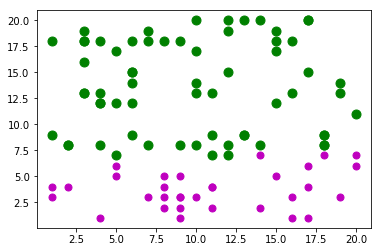

In [25]:
# sac à dos que l'on souhaite représenter (glouton selon l'encombrement)
# ATTENTION à choisir la clef de façon compatible avec la fonction greedy_indices

mykey = lambda x: (x[1], -x[0])  # clef pour trier selon l'encombrement croissant des objets

myplot(greedy_indices(items, mykey)[2])

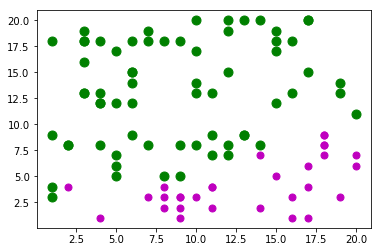

In [26]:
# sac à dos que l'on souhaite représenter (glouton selon le ration valeur/encombrement)
# ATTENTION à choisir la clef de façon compatible avec la fonction greedy_indices

mykey = lambda x: -x[0]/x[1]  # clef pour trier selon le ratio valeur/encombrement décroissant

myplot(greedy_indices(items, mykey)[2])

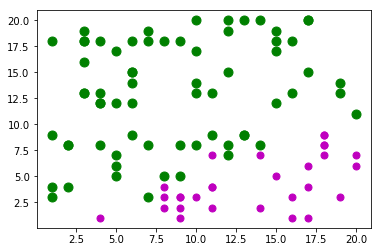

In [43]:
# sac à dos de valeur 393 (obtenu pa rune méthode de Monte-Carlo)

test = [0, 5, 13, 17, 66, 21, 29, 30, 35, 44, 36, 37, 40, 41, 42, 46, 48, 51, 65, 56, 70, 71, 73, 76, 78, 82, 89, 90, 95]
myplot(test)

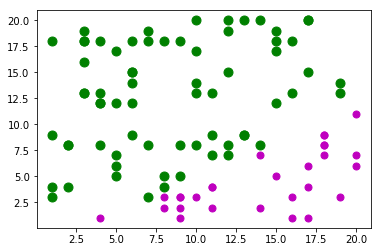

In [55]:
# sac à dos de valeur 394 (obtenu par une méthode de Monte-Carlo)

test =  [0, 5, 13, 17, 66, 21, 29, 35, 44, 36, 37, 40, 41, 42, 48, 51, 65, 56, 70, 71, 73, 76, 77, 78, 82, 89, 90, 95]

myplot(test)

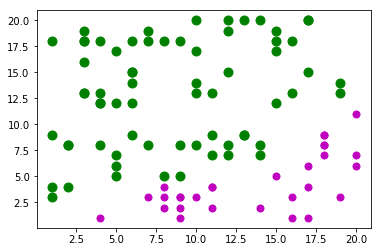

In [19]:
# sac à dos de valeur 395 (obtenu pa rune méthode de Monte-Carlo)

test = [0, 5, 13, 17, 21, 27, 29, 30, 35, 36, 37, 40, 41, 42, 44, 48, 51, 56, 65, 66, 70, 71, 73, 76, 77, 78, 82, 90, 95]
myplot(test)